# Adding dropout to prevent overfitting
Another popular method for regularization is dropout. A dropout forces a neural network to learn multiple independent
representations by randomly removing connections between neurons in the learning phase. For example, when using
a dropout of 0.5, the network has to see each example twice before the connection is learned. Therefore, a network with dropout can be seen as an ensemble of networks. <br><br>
In the following example, we will improve a model that clearly overfits the training data by adding dropouts.

In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout

import numpy as np
from matplotlib import pyplot as plt

Using TensorFlow backend.


### Load the dataset and extract features

In [2]:
data = pd.read_csv('data/hour.csv')
# Feature engineering
ohe_features = ['season', 'weathersit', 'mnth', 'hr', 'weekday']
for feature in ohe_features:
    dummies = pd.get_dummies(data[feature], prefix=feature, drop_first=False)
    data = pd.concat([data, dummies], axis=1)

drop_features = ['instant', 'dteday', 'season', 'weathersit', 'weekday', 'atemp', 'mnth', 'workingday', 'hr', 'casual', 'registered']
data = data.drop(drop_features, axis=1)

### Normalize features

In [3]:
norm_features = ['cnt', 'temp', 'hum', 'windspeed']
scaled_features = {}
for feature in norm_features:
    mean, std = data[feature].mean(), data[feature].std()
    scaled_features[feature] = [mean, std]
    data.loc[:, feature] = (data[feature] - mean)/std

### Split the dataset for training, validation, and testing

In [4]:
# Save the final month for testing
test_data = data[-31*24:]
data = data[:-31*24]

# Extract the target field
target_fields = ['cnt']
features, targets = data.drop(target_fields, axis=1), data[target_fields]
test_features, test_targets = test_data.drop(target_fields, axis=1), test_data[target_fields]

# Create a validation set (based on the last )
X_train, y_train = features[:-30*24], targets[:-30*24]
X_val, y_val = features[-30*24:], targets[-30*24:]

### Define the model

In [5]:
model = Sequential()
model.add(Dense(250, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile model
model.compile(loss='mse', optimizer='sgd', metrics=['mse'])

### Set the hyperparameters and train the model

In [6]:
n_epochs = 1000
batch_size = 1024

history = model.fit(X_train.values, y_train['cnt'], 
    validation_data=(X_val.values, y_val['cnt']), 
    batch_size=batch_size, epochs=n_epochs, verbose=0
    )

### Plot the training and validation losses

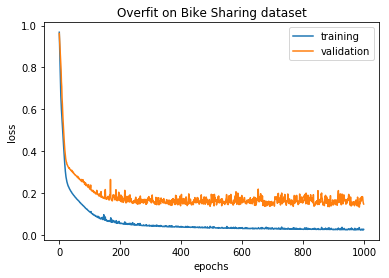

In [7]:
plt.plot(np.arange(len(history.history['loss'])), history.history['loss'], label='training')
plt.plot(np.arange(len(history.history['val_loss'])), history.history['val_loss'], label='validation')
plt.title('Overfit on Bike Sharing dataset')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc=0)
plt.show()

Model overfits on training data (training loss shows slightly increasing trend after 450 epochs)

### Pint the minimum loss

In [8]:
print('Minimum loss: ', min(history.history['val_loss']), 
 '\nAfter ', np.argmin(history.history['val_loss']), ' epochs')

# Minimum loss:  0.129907280207 
# After  980  epochs

Minimum loss:  0.132840290666 
After  985  epochs


### Add dropouts to our network architecture to prevent overfitting

In [9]:
model_drop = Sequential()
model_drop.add(Dense(250, input_dim=X_train.shape[1], activation='relu'))
model_drop.add(Dropout(0.20))
model_drop.add(Dense(150, activation='relu'))
model_drop.add(Dropout(0.20))
model_drop.add(Dense(50, activation='relu'))
model_drop.add(Dropout(0.20))
model_drop.add(Dense(25, activation='relu'))
model_drop.add(Dropout(0.20))
model_drop.add(Dense(1, activation='linear'))

# Compile model
model_drop.compile(loss='mse', optimizer='sgd', metrics=['mse'])

### Train our new model

In [10]:
history_drop = model_drop.fit(X_train.values, y_train['cnt'], 
    validation_data=(X_val.values, y_val['cnt']), 
    batch_size=batch_size, epochs=n_epochs, verbose=0
    )

### Plot the results

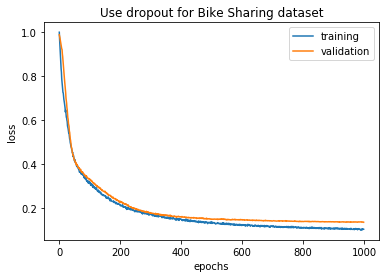

In [11]:
plt.plot(np.arange(len(history_drop.history['loss'])), history_drop.history['loss'], label='training')
plt.plot(np.arange(len(history_drop.history['val_loss'])), history_drop.history['val_loss'], label='validation')
plt.title('Use dropout for Bike Sharing dataset')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc=0)
plt.show()

Model with dropouts to prevent overfitting

### print the final statistics

In [12]:
print('Minimum loss: ', min(history_drop.history['val_loss']), 
 '\nAfter ', np.argmin(history_drop.history['val_loss']), ' epochs')

# Minimum loss:  0.126063346863 
# After  998  epochs

Minimum loss:  0.134210646152 
After  919  epochs
